In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('student-data.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


In [3]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
# using the label encoder and one hot encoder to transfrom data into integers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_en= LabelEncoder()
a=['school','Mjob', 'Fjob', 'reason', 'guardian','higher','passed', 'sex','address','famsize','Pstatus','schoolsup', 'famsup', 'paid']
for i in np.arange(len(a)):
    data[a[i]]= label_en.fit_transform(data[a[i]])
data= pd.get_dummies(data, columns=[ 'activities', 'nursery', 'internet', 'romantic'])

In [6]:
# Checking the column names
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'higher', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'passed',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [7]:
#Adding new columns by connecting relatable columns and droping the old columns 
data['Leisure_time'] = data[['freetime', 'goout']].mean(axis=1)
data['Alcohol_con'] =data[[ 'Dalc', 'Walc']].mean(axis=1)
data = data.drop(['freetime','goout','Dalc', 'Walc'],axis=1)

In [8]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,activities_no,activities_yes,nursery_no,nursery_yes,internet_no,internet_yes,romantic_no,romantic_yes,Leisure_time,Alcohol_con
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,1,1,0,1,0,3.5,1.0
1,0,0,17,1,0,1,1,1,0,2,...,1,0,1,0,0,1,1,0,3.0,1.0
2,0,0,15,1,1,1,1,1,0,2,...,1,0,0,1,0,1,1,0,2.5,2.5
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,1,0,1,0,1,2.0,1.0
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,1,1,0,1,0,2.5,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,1,0,0,1,1,0,1,0,4.5,4.5
391,1,1,17,1,1,1,3,1,3,3,...,1,0,1,0,0,1,1,0,4.5,3.5
392,1,1,21,0,0,1,1,1,2,2,...,1,0,1,0,1,0,1,0,4.0,3.0
393,1,1,18,0,1,1,3,2,3,2,...,1,0,1,0,0,1,1,0,2.5,3.5


In [9]:
#Selecting the x and y variables
X= data.drop(['passed'],axis=1)
y =data['passed']

In [10]:
# Importing metrics and train_test_split and spliting the data
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=2, test_size= 0.3)

In [11]:
#Importing the Randomforest algorithum and fitting the model
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [12]:
#Checking the scores of the model
print('Accuracy Score is:', accuracy_score(y_test, y_pred))
print('Recall Score is:', recall_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('F1 score is:', f1_score(y_test, y_pred))

Accuracy Score is: 0.7226890756302521
Recall Score is: 0.925
Precision Score: 0.7326732673267327
F1 score is: 0.8176795580110497


In [13]:
# Checking the confusion matrix for random forest model
confusion_matrix(y_test, y_pred)

array([[12, 27],
       [ 6, 74]], dtype=int64)

school:0.015471998433427557
sex:0.022146816607244758
age:0.05929293900594599
address:0.01574261957835746
famsize:0.017448179504714244
Pstatus:0.01041369534244009
Medu:0.0421256316424953
Fedu:0.03877889245635733
Mjob:0.043046891192993986
Fjob:0.035987473974572956
reason:0.0392567146995271
guardian:0.0291433079109838
traveltime:0.022995542487987783
studytime:0.03974386918220513
failures:0.08853979875679024
schoolsup:0.02250980098775984
famsup:0.019609549572631103
paid:0.019008683994816433
higher:0.016182133805833162
famrel:0.03708073064980388
freetime:0.04988262057942967
goout:0.08231254650030603
Dalc:0.015358098570394933
Walc:0.01538256872390028
health:0.01205375220739494
absences:0.012184552955264464
passed:0.015151873155476432
activities_no:0.014598422009130464
activities_yes:0.015069342056221511
nursery_no:0.016148754383469452
nursery_yes:0.06713924937612478
internet_no:0.05019294969599893


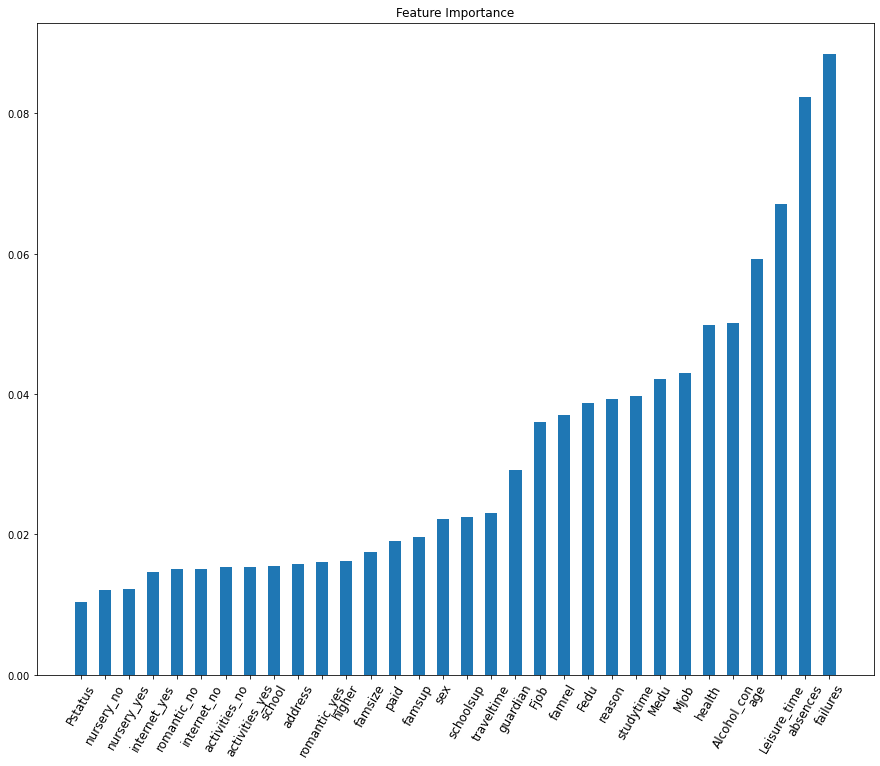

In [14]:
# Checking feature importance
pd.Series(rfc.feature_importances_,index=X.columns).sort_values(ascending=False)
importances=rfc.feature_importances_
for i,features in zip(importances,['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid', 'higher', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'passed','activities_no', 'activities_yes', 'nursery_no', 'nursery_yes','internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']):
    print("{}:{}".format(features,i))
indices = np.argsort(importances)

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Barplot: Add bars
plt.figure(figsize=(15,12))
plt.bar(range(X_train.shape[1]), importances[indices],width=0.5)

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]),names, rotation=60, fontsize = 12)
#from here we can see that absences is the important features for determining the grades of students

# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

In [15]:
#Importing KNN model and fitting the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

In [16]:
# Checking the value scores for KNN model
print('Accuracy Score is:', accuracy_score(y_test, y_pred_knn))
print('Recall Score is:', recall_score(y_test, y_pred_knn))
print('Precision Score:', precision_score(y_test, y_pred_knn))
print('F1 score is:', f1_score(y_test, y_pred_knn))

Accuracy Score is: 0.7058823529411765
Recall Score is: 0.8875
Precision Score: 0.7319587628865979
F1 score is: 0.8022598870056498


In [17]:
# Checking the confusion matrix for KNN model
confusion_matrix(y_test, y_pred_knn)

array([[13, 26],
       [ 9, 71]], dtype=int64)

In [18]:
# Importing the SVM model and fitting the model
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred_SVC = classifier.predict(X_test)

In [19]:
# Checking the value score for SVM models
print('Accuracy Score is:', accuracy_score(y_test, y_pred_SVC))
print('Recall Score is:', recall_score(y_test, y_pred_SVC))
print('Precision Score:', precision_score(y_test, y_pred_SVC))
print('F1 score is:', f1_score(y_test, y_pred_SVC))

Accuracy Score is: 0.6638655462184874
Recall Score is: 0.9875
Precision Score: 0.6694915254237288
F1 score is: 0.797979797979798
